In [ ]:
!pip install imblearn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

FileNotFoundError: [Errno 2] No such file or directory: '/content/cuisines.csv'

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv('/content/drive/MyDrive/cuisines.csv')

In [13]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
df.shape

(2448, 385)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: ylabel='cuisine'>

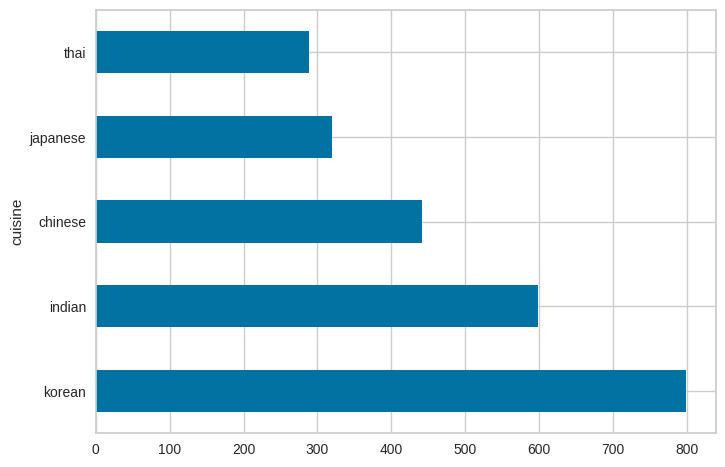

In [10]:
df.cuisine.value_counts().plot.barh()

In [11]:
thai_ =  df[(df.cuisine == 'thai')]
indian_ = df[(df.cuisine == "indian")]
chinese_ = df[(df.cuisine == "chinese")]
japanese_ = df[(df.cuisine == "japanese")]
korean_ = df[(df.cuisine == "korean")]

print(f"Thai: {thai_.shape[0]}")
print(f"Indian: {indian_.shape[0]}")
print(f"Chinese: {chinese_.shape[0]}")
print(f"Japanese: {japanese_.shape[0]}")
print(f"Korean: {korean_.shape[0]}")

Thai: 289
Indian: 598
Chinese: 442
Japanese: 320
Korean: 799


In [12]:
def create_ingredient_df(df):
  # Drop the 'cuisine' and 'Unnamed: 0' columns from the transposed DataFrame
  ingredient_col = df.T.drop(['cuisine','Unnamed: 0']).sum(axis = 1).to_frame("value")
  # Filter out ingredients with a sum of 0 across all rows in the original DataFrame
  ingredient_col = ingredient_col[ingredient_col['value'] != 0]
  ingredient_col.sort_values(by = 'value', ascending = False, inplace = False)
  return ingredient_col

In [13]:
# now check for each countory cuiseine

thai_ingredient = create_ingredient_df(thai_)
indian_ingredient = create_ingredient_df(indian_)
chinese_ingredient = create_ingredient_df(chinese_)
japanese_ingredient = create_ingredient_df(japanese_)
korean_ingredient = create_ingredient_df(korean_)

<Axes: >

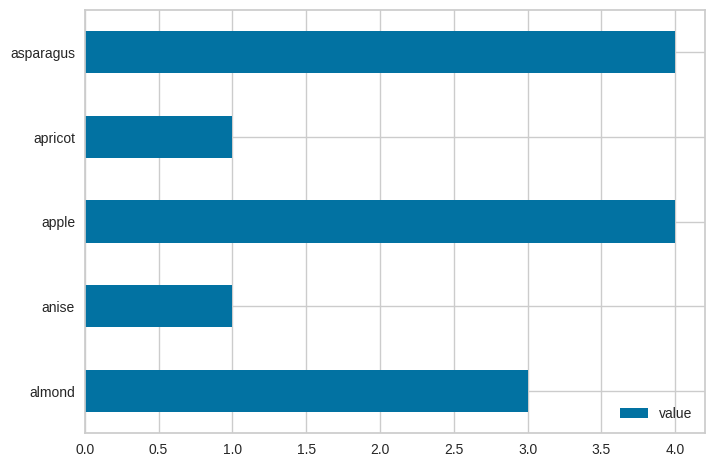

In [14]:
# create a barh plot for each country
thai_ingredient.head().plot.barh()

<Axes: >

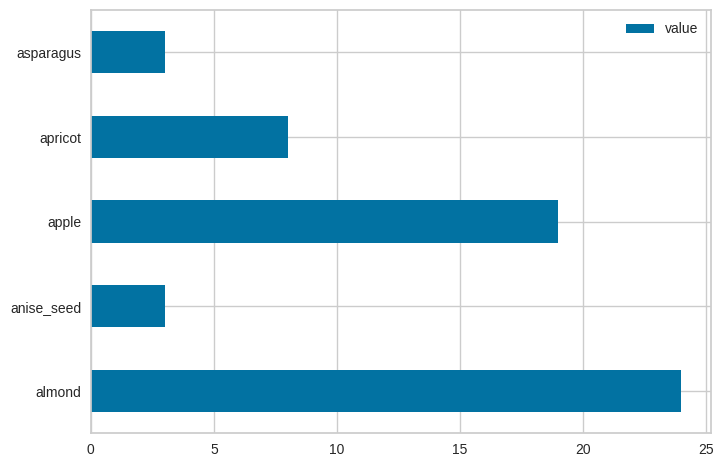

In [15]:
indian_ingredient.head().plot.barh()

<Axes: >

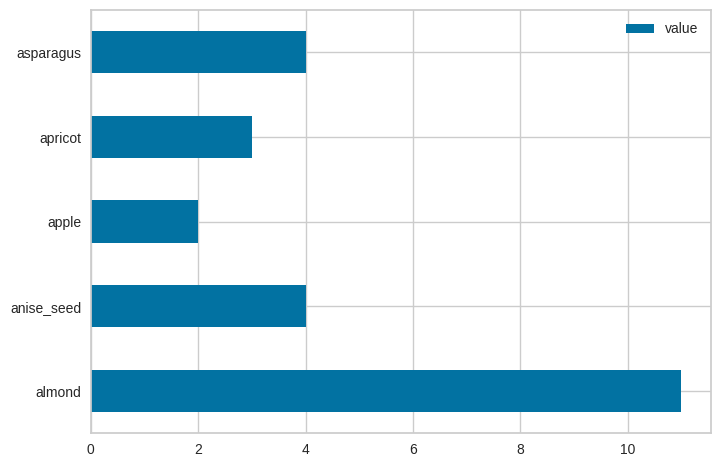

In [16]:
 chinese_ingredient.head().plot.barh()

<Axes: >

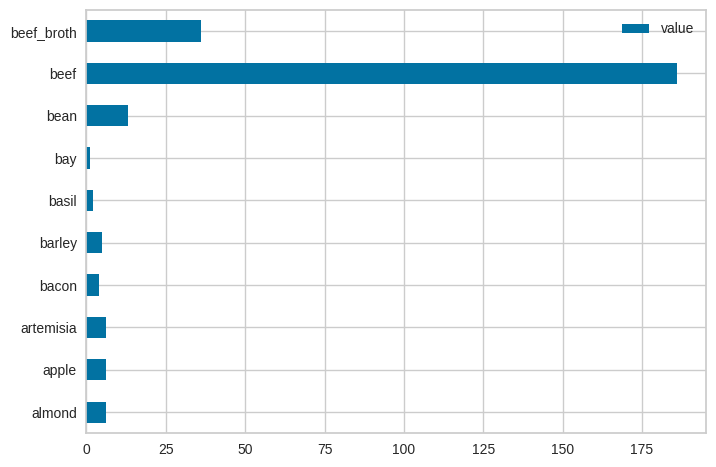

In [17]:
korean_ingredient.head(10).plot.barh()

<Axes: >

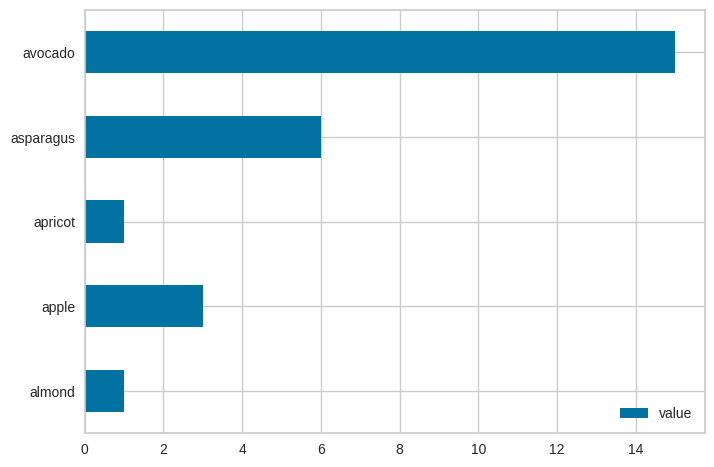

In [18]:
japanese_ingredient.head().plot.barh()

In [19]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
oversample = SMOTE(random_state=42)
X_train, y_train = oversample.fit_resample(feature_df, labels_df)

In [21]:
print(f'new label count: {y_train.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count: cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [22]:
transformed_df = pd.concat([y_train,X_train],axis=1, join='outer')

In [23]:
transformed_df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [24]:
transformed_df.shape

(3995, 381)

In [27]:
transformed_df.to_csv("/cuisines_cleaned.csv")



In [48]:
datas = pd.read_csv("/cuisines_cleaned.csv")







In [28]:
!pip install pycaret

In [49]:
from pycaret.classification import *
exp = setup(data=datas, target='cuisine', session_id=123)

,Description,Value
0,Session id,123
1,Target,cuisine
2,Target type,Multiclass
3,Target mapping,"chinese: 0, indian: 1, japanese: 2, korean: 3, thai: 4"
4,Original data shape,"(3995, 382)"
5,Transformed data shape,"(3995, 382)"
6,Transformed train set shape,"(2796, 382)"
7,Transformed test set shape,"(1199, 382)"
8,Numeric features,381
9,Preprocess,True


In [ ]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9968,1.0000,0.9968,0.9968,0.9968,0.9960,0.9960,0.1970
gbc,Gradient Boosting Classifier,0.9964,0.0000,0.9964,0.9965,0.9964,0.9955,0.9956,5.4960
xgboost,Extreme Gradient Boosting,0.9900,0.9999,0.9900,0.9901,0.9900,0.9875,0.9875,1.4380
lightgbm,Light Gradient Boosting Machine,0.9875,0.9997,0.9875,0.9877,0.9875,0.9844,0.9844,1.8440
dt,Decision Tree Classifier,0.9771,0.9857,0.9771,0.9775,0.9771,0.9714,0.9715,0.1540
rf,Random Forest Classifier,0.9059,0.9899,0.9059,0.9104,0.9062,0.8824,0.8833,0.7630
et,Extra Trees Classifier,0.8966,0.9859,0.8966,0.8993,0.8967,0.8708,0.8714,1.0860
lr,Logistic Regression,0.8233,0.0000,0.8233,0.8263,0.8233,0.7791,0.7798,7.0470
ridge,Ridge Classifier,0.8026,0.0000,0.8026,0.8094,0.8034,0.7532,0.7546,0.1460
ada,Ada Boost Classifier,0.7929,0.0000,0.7929,0.8251,0.7913,0.7411,0.7500,0.5420


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [53]:
# i used here the pycaret to just know which model is best for me so i want to select the random forest
X = df.drop("cuisine", axis=1)   # all columns except target
y = df["cuisine"]

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [64]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)


In [65]:
 rf.score(X_train, y_train)


1.0

In [66]:
print(rf.score(X_train, y_train))


1.0


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate accuracy
accuracy = accuracy_score(y_train, rf.predict(X_train))
print(f"Accuracy: {accuracy}")

# Calculate recall
recall = recall_score(y_train, rf.predict(X_train), average='macro') # Use macro average for multiclass
print(f"Recall: {recall}")

# Generate confusion matrix
cm = confusion_matrix(y_train, rf.predict(X_train))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [68]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)


Training Accuracy: 1.0
Testing Accuracy: 0.9040816326530612


In [70]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(rf, X, y, cv=5)
print("CV Accuracy:", np.mean(scores))


CV Accuracy: 0.8847585660030883
